In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

train_df = pd.read_csv('econet dataset/train.csv')
unique_locations = train_df['Station'].unique()
print("The locations in the training dataset are: ", unique_locations)
print("\nCount: ", len(unique_locations))
print(train_df.shape)

The locations in the training dataset are:  ['AURO' 'BAHA' 'BALD' 'BEAR' 'BUCK' 'BURN' 'CAST' 'CHAP' 'CLA2' 'CLAY'
 'CLIN' 'DURH' 'FLET' 'FRYI' 'GOLD' 'HAML' 'JACK' 'JEFF' 'KINS' 'LAKE'
 'LAUR' 'LEWS' 'LILE' 'MITC' 'NCAT' 'NEWL' 'OXFO' 'PLYM' 'REED' 'REID'
 'ROCK' 'SALI' 'SASS' 'SILR' 'SPIN' 'SPRU' 'TAYL' 'UNCA' 'WAYN' 'WHIT'
 'WILD' 'WILL' 'WINE']

Count:  43
(6593274, 9)


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593274 entries, 0 to 6593273
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Station  object 
 1   Ob       object 
 2   value    float64
 3   measure  object 
 4   target   bool   
 5   R_flag   int64  
 6   I_flag   int64  
 7   Z_flag   int64  
 8   B_flag   int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 408.7+ MB


In [10]:
train_df['Ob'] = pd.to_datetime(train_df['Ob'])

In [11]:
print(train_df.head(5))

  Station                  Ob  value   measure  target  R_flag  I_flag  \
0    AURO 2021-01-02 00:30:00   19.2  temp_wxt   False       2      -1   
1    AURO 2021-01-02 04:30:00   19.8  temp_wxt   False       2      -1   
2    AURO 2021-01-02 05:30:00   19.5  temp_wxt   False       2      -1   
3    AURO 2021-01-02 07:30:00   18.5  temp_wxt   False       2      -1   
4    AURO 2021-02-16 02:30:00   17.7  temp_wxt   False       2      -1   

   Z_flag  B_flag  
0       0       1  
1       0       1  
2       0       1  
3       0       1  
4       0       1  


In [12]:
temp_df = train_df.loc[train_df['Station'] == 'AURO']

In [13]:
temp_df['month'] = pd.DatetimeIndex(temp_df['Ob']).month

<AxesSubplot:xlabel='month', ylabel='value'>

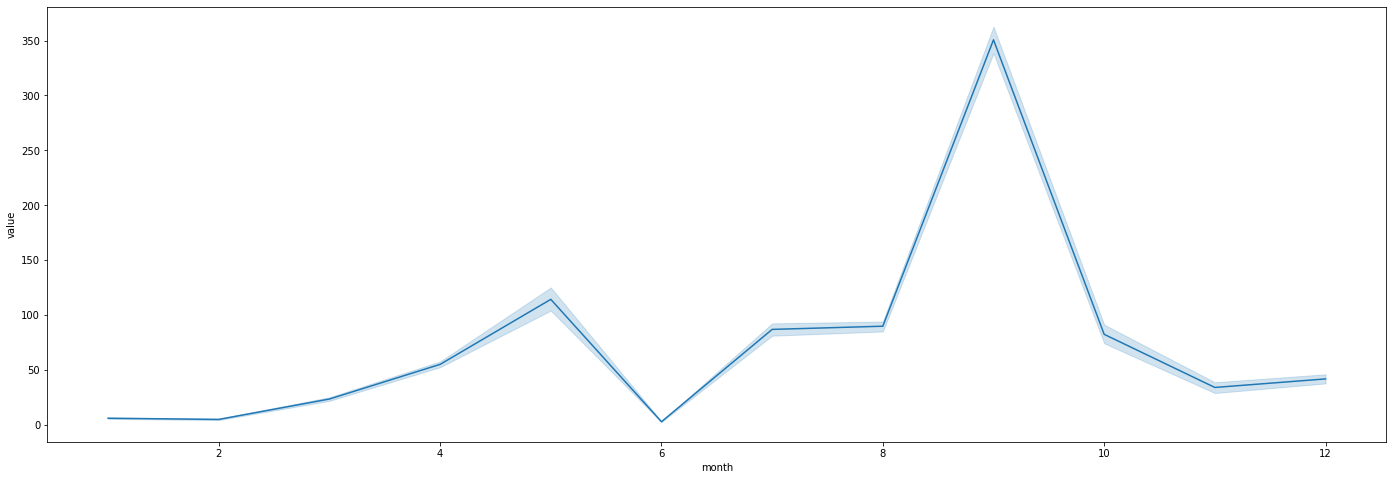

In [14]:
plt.figure(figsize=(24,8))
sns.lineplot(temp_df['month'], temp_df['value'])

<AxesSubplot:xlabel='Ob', ylabel='target'>

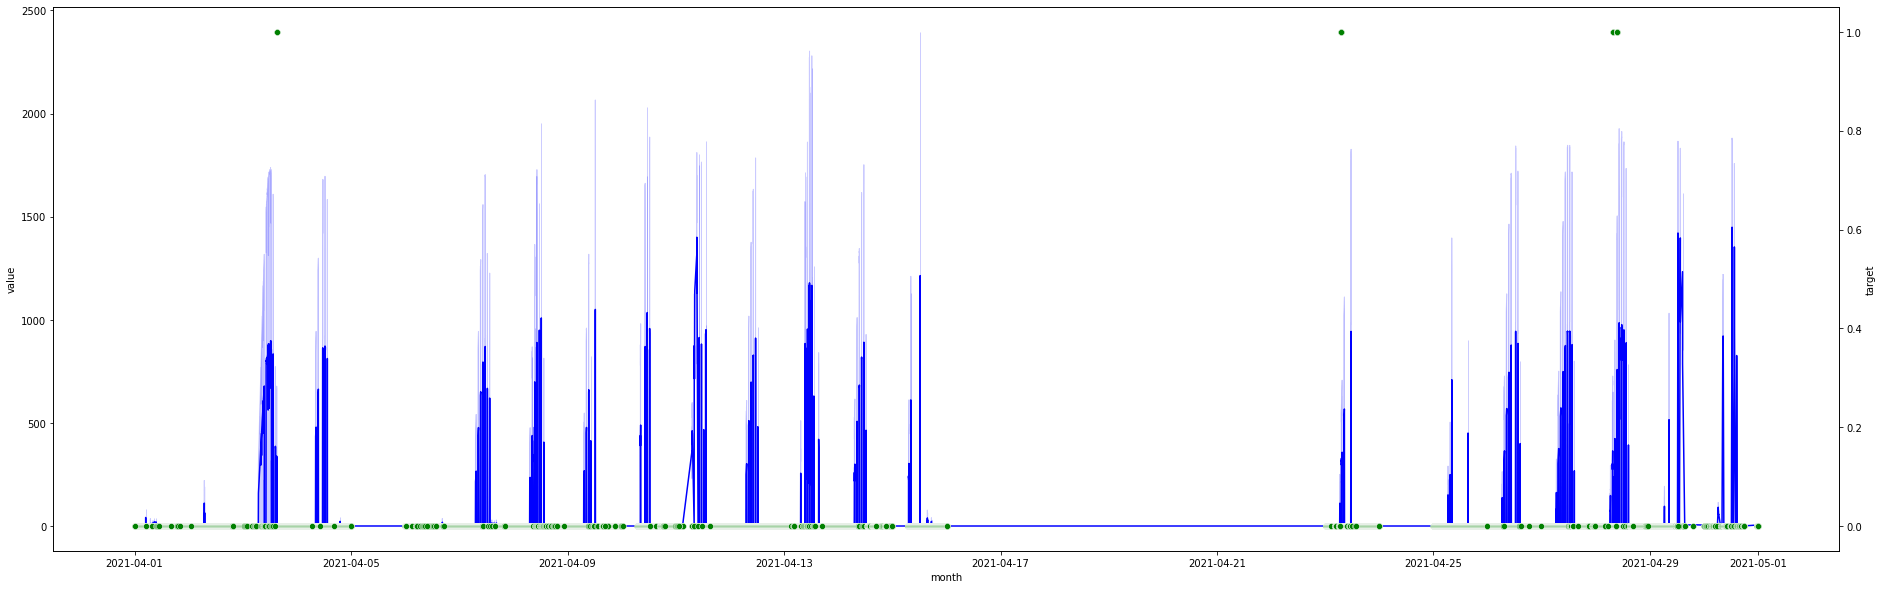

In [15]:
import seaborn as sns
plt.figure(figsize=(32,10))
plt.xlabel('month')
plt.ylabel('value')

#Change the location if you want to check for other locations.
temp_df = train_df.loc[train_df['Station'] == 'AURO']
temp_df['month'] = pd.DatetimeIndex(temp_df['Ob']).month

#Change the value of the month if you want to see for different months.
df = temp_df.loc[temp_df['month'] == 4]
sns.lineplot(df['Ob'], df['value'], color='b')
ax2 = plt.twinx()
sns.scatterplot(df['Ob'], df['target'], color="g", ax=ax2)

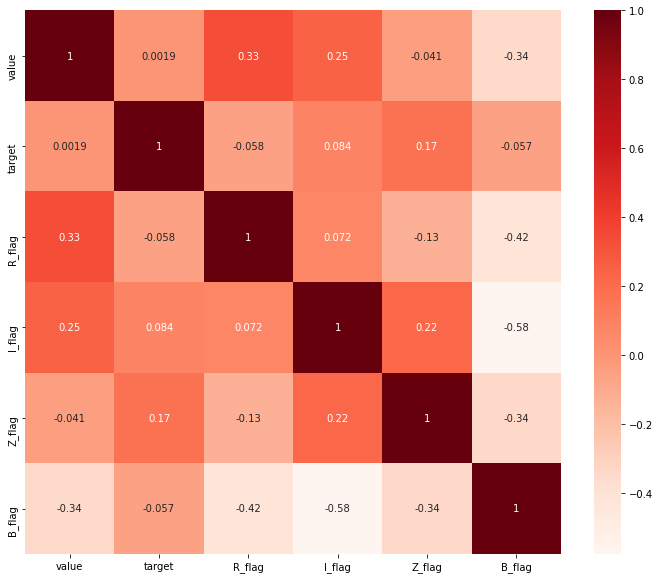

In [16]:
plt.figure(figsize=(12,10))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## As you can see from the above heatmap, the correlation between the values and the target variable is very low with the highest being 0.17 between Z_flag and target

In [17]:
print(train_df.columns)

Index(['Station', 'Ob', 'value', 'measure', 'target', 'R_flag', 'I_flag',
       'Z_flag', 'B_flag'],
      dtype='object')


In [29]:
from sklearn.preprocessing import StandardScaler

features = ['value', 'measure', 'R_flag', 'I_flag', 'Z_flag', 'B_flag']
temp_df = train_df.loc[:]
temp_df['measure'] = pd.get_dummies(temp_df['measure'])
x = temp_df.loc[:, features].values
print(x)
y = temp_df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)
print(x)

[[19.2    0.     2.    -1.     0.     1.   ]
 [19.8    0.     2.    -1.     0.     1.   ]
 [19.5    0.     2.    -1.     0.     1.   ]
 ...
 [-5.123  1.     4.    -1.    -1.    -1.   ]
 [-5.09   1.     4.    -1.    -1.    -1.   ]
 [-4.958  1.     0.    -1.    -1.    -1.   ]]
[[-0.25145997 -0.08359603  1.28024097 -0.40013929  1.23398172  0.43169473]
 [-0.24933667 -0.08359603  1.28024097 -0.40013929  1.23398172  0.43169473]
 [-0.25039832 -0.08359603  1.28024097 -0.40013929  1.23398172  0.43169473]
 ...
 [-0.33753475 11.96228995  3.0125862  -0.40013929 -0.34186828 -1.45115705]
 [-0.33741797 11.96228995  3.0125862  -0.40013929 -0.34186828 -1.45115705]
 [-0.33695085 11.96228995 -0.45210427 -0.40013929 -0.34186828 -1.45115705]]


In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
principalComponents = pca.fit_transform(x)
p_df = pd.DataFrame(principalComponents)

In [28]:
p_df.head()

,0,1,2,3,4
0,0.201806,-0.035081,0.529383,1.402173,-0.528238
1,0.202680,-0.035584,0.528335,1.402574,-0.526745
2,0.202243,-0.035333,0.528859,1.402374,-0.527491
3,0.200787,-0.034495,0.530605,1.401704,-0.529980
4,0.199622,-0.033824,0.532002,1.401169,-0.531971


In [21]:
finalDf = pd.concat([p_df, temp_df[['target']]], axis = 1)
print(finalDf.head())

          0         1         2         3         4  target
0  0.201806 -0.035081  0.529383  1.402173 -0.528238   False
1  0.202680 -0.035584  0.528335  1.402574 -0.526745   False
2  0.202243 -0.035333  0.528859  1.402374 -0.527491   False
3  0.200787 -0.034495  0.530605  1.401704 -0.529980   False
4  0.199622 -0.033824  0.532002  1.401169 -0.531971   False


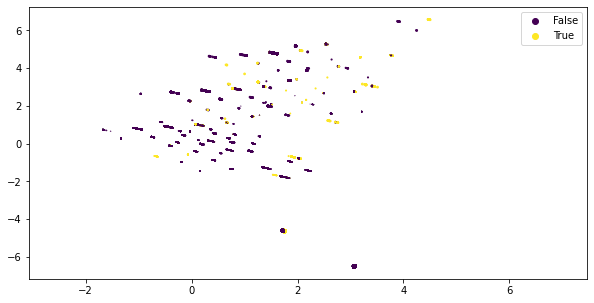

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(principalComponents[:,0], principalComponents[:,1], principalComponents[:,2], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(finalDf['target'].unique()))
plt.show()

In [33]:
finalDf['target'].value_counts()

False    6358102
True      235172
Name: target, dtype: int64